## Рубежный контроль №1.
### ИУ5-24М Шевчук М.С. Вариант 17.
#### Задание №17
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием преобразования Йео-Джонсона (Yeo-Johnson transformation).  
#### Задание №37
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectPercentile для 5% лучших признаков, и метод, основанный на взаимной информации.
#### Для студентов группы ИУ5-24М
Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.feature_selection import SelectPercentile, mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('C:/Users/user/Downloads/39_Specific_purpose_of_kidnapping_and_abduction.csv', sep=',', decimal=',')
data = data.dropna()
data.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Total,K_A_Female_Upto_10_Years,K_A_Grand_Total,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Total,K_A_Male_Upto_10_Years
0,Andhra Pradesh,2001,Kidnap - For Adoption,01. For Adoption,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1,Arunachal Pradesh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Kidnap - For Adoption,01. For Adoption,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,15.0,3.0,0.0,18.0,0.0
4,Chandigarh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.dtypes

Area_Name                     object
Year                           int64
Group_Name                    object
Sub_Group_Name                object
K_A_Cases_Reported           float64
K_A_Female_10_15_Years       float64
K_A_Female_15_18_Years       float64
K_A_Female_18_30_Years       float64
K_A_Female_30_50_Years       float64
K_A_Female_Above_50_Years    float64
K_A_Female_Total             float64
K_A_Female_Upto_10_Years     float64
K_A_Grand_Total              float64
K_A_Male_10_15_Years         float64
K_A_Male_15_18_Years         float64
K_A_Male_18_30_Years         float64
K_A_Male_30_50_Years         float64
K_A_Male_Above_50_Years      float64
K_A_Male_Total               float64
K_A_Male_Upto_10_Years       float64
dtype: object

### Нормализация числового признака преобразованием Йео-Джонсона + построение гистограммы
Столбец до преобразования

(array([2.496e+03, 1.390e+02, 5.800e+01, 7.800e+01, 3.400e+01, 2.700e+01,
        9.000e+00, 1.000e+01, 9.000e+00, 5.000e+00, 7.000e+00, 4.000e+00,
        4.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00]),
 array([   0.  ,  252.84,  505.68,  758.52, 1011.36, 1264.2 , 1517.04,
        1769.88, 2022.72, 2275.56, 2528.4 , 2781.24, 3034.08, 3286.92,
        3539.76, 3792.6 , 4045.44, 4298.28, 4551.12, 4803.96, 5056.8 ,
        5309.64, 5562.48, 5815.32, 6068.16, 6321.  ]),
 <BarContainer object of 25 artists>)

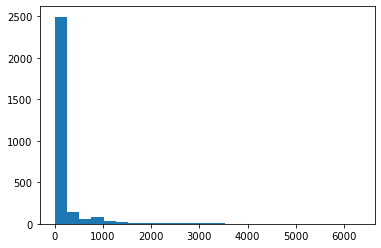

In [4]:
col_to_normalize = 'K_A_Cases_Reported'
plt.hist(data[col_to_normalize], bins=25)

После преобразования

(array([1175.,    0.,    0.,    0.,  184.,    0.,   99.,   63.,   39.,
          34.,   68.,   40.,   61.,   63.,  110.,   99.,   88.,   96.,
          96.,  101.,  104.,  115.,  140.,   85.,   30.]),
 array([0.        , 0.15030059, 0.30060118, 0.45090178, 0.60120237,
        0.75150296, 0.90180355, 1.05210414, 1.20240474, 1.35270533,
        1.50300592, 1.65330651, 1.8036071 , 1.9539077 , 2.10420829,
        2.25450888, 2.40480947, 2.55511006, 2.70541066, 2.85571125,
        3.00601184, 3.15631243, 3.30661302, 3.45691361, 3.60721421,
        3.7575148 ]),
 <BarContainer object of 25 artists>)

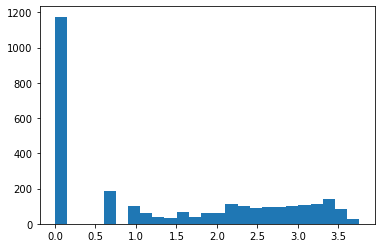

In [5]:
normalized_col, params = stats.yeojohnson(data[col_to_normalize]) 
plt.hist(normalized_col, bins=25)

### Отбор 5% признаков с помощью класса SelectPercentile и метода основанного на взаимной информации

In [6]:
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [7]:
y = data['K_A_Female_Total']
x = data[data.columns.difference(['K_A_Female_Total', 'Year'])]
print(x.shape, y.shape)

(2890, 18) (2890,)


Отберём 5% лучших признаков, отобранных с помощью метода mutual_info_classif для задачи классификации

In [8]:
sel_mi = SelectPercentile(mutual_info_classif, percentile=5).fit(x, y)

list(zip(x.columns, sel_mi.get_support(), sel_mi.scores_))

[('Area_Name', False, 0.06143838303840132),
 ('Group_Name', False, 0.3402381590958754),
 ('K_A_Cases_Reported', False, 0.9491201322895946),
 ('K_A_Female_10_15_Years', False, 0.30625628678038774),
 ('K_A_Female_15_18_Years', False, 0.4106248034925035),
 ('K_A_Female_18_30_Years', False, 0.9295228127383219),
 ('K_A_Female_30_50_Years', False, 0.3197286588279673),
 ('K_A_Female_Above_50_Years', False, 0.019595818910504992),
 ('K_A_Female_Upto_10_Years', False, 0.13361783628536772),
 ('K_A_Grand_Total', True, 1.0343266688482267),
 ('K_A_Male_10_15_Years', False, 0.03114075212945222),
 ('K_A_Male_15_18_Years', False, 0.03490664893253381),
 ('K_A_Male_18_30_Years', False, 0.14047056844939299),
 ('K_A_Male_30_50_Years', False, 0.11246588881714459),
 ('K_A_Male_Above_50_Years', False, 0.05621118782166068),
 ('K_A_Male_Total', False, 0.16206932570142696),
 ('K_A_Male_Upto_10_Years', False, 0.06925443861190939),
 ('Sub_Group_Name', False, 0.3259947027323644)]

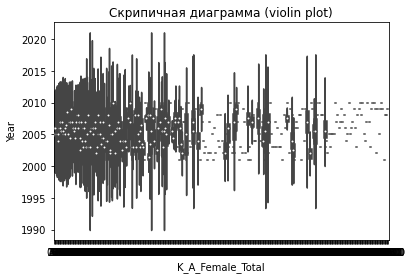

In [10]:
tips = data
sns.violinplot(x="K_A_Female_Total", y="Year", data=tips)
plt.title("Скрипичная диаграмма (violin plot)")
plt.xlabel("K_A_Female_Total")
plt.ylabel("Year")
plt.show()